# Trying CNN on features

In [1]:
# Imports
import os
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
np.random.seed(42)

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Input, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard

Using TensorFlow backend.


In [2]:
# =============================================================================
# PARAMETERS
# =============================================================================

#Training metrics
model_metrics = ['mse', 'mae']

#Training parameters
batch_size = 128
canMultiprocess = False

In [3]:
#Load the data
feats = np.load('age_feats.npy')
labels = np.load('age_labels.npy')
ids = np.load('age_ids.npy')
feats.shape, labels.shape, ids.shape

((2012370, 14, 15), (2012370,), (2012370,))

In [4]:
#Flatten the features
feats = feats.reshape((feats.shape[0], -1))

#Remove nans
valid_idxs = ~np.isnan(feats).any(axis=1)
feats = feats[valid_idxs]
labels = labels[valid_idxs]

print(feats.shape, labels.shape)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(feats, labels, test_size = 0.25, random_state = 42, shuffle = False)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

(2012176, 210) (2012176,)
Training Features Shape: (1509132, 210)
Training Labels Shape: (1509132,)
Testing Features Shape: (503044, 210)
Testing Labels Shape: (503044,)


In [5]:
#Define a model
def get_model():
    model = Sequential()
    # ENTRY LAYER
    model.add(Dense(512, activation='relu', input_shape=(210,)))
    model.add(BatchNormalization())
    model.add(Dense(1))
    
    return model

In [6]:
#Set the model up
model = get_model()

print(model.summary())

#Define optimizer
adam = keras.optimizers.Adam() #Default lr is 0.001

model.compile(loss='mse',
              optimizer=adam,
              metrics=model_metrics)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               108032    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 110,593
Trainable params: 109,569
Non-trainable params: 1,024
_________________________________________________________________
None


In [7]:
#Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=1e-7, verbose=1)

early_stop = EarlyStopping(patience=8, verbose=1, restore_best_weights=True)

#tb = TensorBoard(log_dir=os.path.join(output_dir, 'logs'), 
#                 write_graph=False,) 
                 #histogram_freq=5, 
                 #embeddings_freq=5, 
                 #embeddings_layer_names=['fc1'],
                 #mbeddings_data = X_val)

cb_list = [reduce_lr, early_stop]

In [8]:
history = model.fit(x = train_features,
                    y = train_labels,
                    epochs=1000,
                    validation_data = (test_features, test_labels),
                    callbacks = cb_list,
                    shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 1509132 samples, validate on 503044 samples
Epoch 1/1000
1509132/1509132 [==============================] - 124s 82us/step - loss: 202.6225 - mean_squared_error: 202.6225 - mean_absolute_error: 11.7318 - val_loss: 640.2200 - val_mean_squared_error: 640.2200 - val_mean_absolute_error: 13.1467
Epoch 2/1000
1509132/1509132 [==============================] - 121s 80us/step - loss: 176.4080 - mean_squared_error: 176.4080 - mean_absolute_error: 10.8668 - val_loss: 6080.0094 - val_mean_squared_error: 6080.0094 - val_mean_absolute_error: 14.0700
Epoch 3/1000
1509132/1509132 [==============================] - 121s 80us/step - loss: 166.7526 - mean_squared_error: 166.7526 - mean_absolute_error: 10.4898 - val_loss: 294.8113 - val_mean_squared_error: 294.8113 - val_mean_absolute_error: 13.1470
Epoch 4/1000
1509132/1509132 [==============================] - 121s 80us/step - loss: 161.4997 - mean_squared_error: 161.4997 - mean_absolute_error: 

# Visualize Results

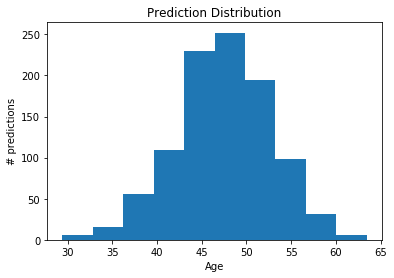

In [10]:
#Example predictions
pred = model.predict(test_features[:1000])

plt.figure()
plt.title('Prediction Distribution')
plt.xlabel('Age')
plt.ylabel('# predictions')
plt.hist(pred)
plt.show()

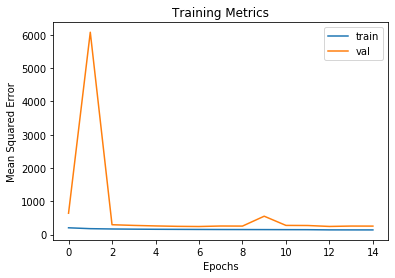

In [11]:
plt.figure()
plt.plot(history.history['mean_squared_error'], label='train')
plt.plot(history.history['val_mean_squared_error'], label='val')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Metrics')
plt.show()

In [12]:
y_pred = model.predict(train_features)

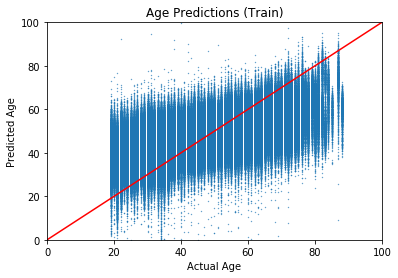

In [13]:
plt.figure()
plt.scatter(train_labels, y_pred, s=0.1)
plt.plot([0, 100], [0, 100], 'r-')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title("Age Predictions (Train)")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.show()

In [ ]:
y_pred = model.predict(test_features)

In [ ]:
plt.figure()
plt.scatter(test_labels, y_pred, s=0.1)
plt.plot([0, 100], [0, 100], 'r-')
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.title("Age Predictions")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.show()